In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
class Utilities:
    def __init__(self, df=None):
        self.df = df
    
    def get_mean_volume(self, symbol):
        """Return the mean volume for stock indicated by symbol."""
        # return df['Volume'].max()
        return self.df['Volume'].mean() 

    def symbol_to_path(self, symbol, base_dir="csvs"):
        """Return CSV file path given ticker symbol, for example IBM. The return will be 
        'path_to_dir/data/IBM.csv' """
        return os.path.join(base_dir, "{}.csv".format(str(symbol)))

    def get_data(self, symbols, dates):
        """Read stock data (adjusted close) for given symbols from CSV files."""
        df = pd.DataFrame(index=dates)
        if 'SPY' not in symbols:  # add SPY for reference, if absent
            symbols.insert(0, 'SPY')
#         print(df.head())
        for symbol in symbols:
            # TODO: Read and join data for each symbol
            path = self.symbol_to_path(symbol)
            df_temp = pd.read_csv(path, index_col='Date', 
                                  parse_dates=True, usecols=['Date', 'Adj Close'],
                                 na_values=['nan'])
            df_temp = df_temp.rename(columns={'Adj Close':symbol})
            df = df.join(df_temp)
            if symbol == 'SPY': # drop dates when SPY did not trade
                df = df.dropna(subset=["SPY"])
        return df
    
    def plot_data(self, df, title="Stock prices"):
        """Plot stock prices with a custom title and meaningful axis labels."""
        ax = df.plot(title=title, fontsize=12)
        ax.set_xlabel("Date")
        ax.set_ylabel("Price")
        plt.show()
    
    def plot_selected(self, df, columns, start_index, end_index):
        """Plot the desired columns over index values in the given range."""
        # TODO: Your code here
        data = df.loc[start_index:end_index, columns]
        plot_data(data)

    def normalize(self, df):
        return df/df.loc[0, :]

    def statistics(self, df):
        mean = df.mean()
        std_dev = df.std()
        median = df.median()
        return mean, std_dev, median
    
    def fill_missing_values(self, df_data):
        """Fill missing values in data frame, in place."""
        df_data.fillna(method='ffill', inplace=True)
        df_data.fillna(method='bfill', inplace=True)
        
    def compute_daily_returns(self, df):
        daily_returns = df.copy()
        """Using Numpy"""
#         Ndaily_returns = df.copy()
#         Ndaily_returns = (df[1:]/df[:-1].values) - 1
#         Ndaily_returns.loc[0, :] = 0  # set daily returns of row 0 to 0

        """Using pandas"""
        daily_returns = (df/df.shift(1)) - 1        
        if daily_returns.ndim == 1:
            daily_returns[0] = 0
        else:
            daily_returns.iloc[0, :] = 0  # set daily returns of row 0 to 0
        return daily_returns

    def cumulative_returns(self, df, time_point):
        cum_returns = (df[time_point, :]/df[0, :]) - 1
        cum_returns.loc[0, :] = 0  # set daily returns of row 0 to 0
        return cum_returns
    
    def momentum(self, currentPrice, prevPrice):
        return currentPrice/prevPrice - 1
    
    def correlation(self, Y1, Y2):
        return np.correlation(Y1, Y2)
    

In [7]:
class BollingerBands:
    def __init__(self, df=None):
        self.df = df
        
    def get_rolling_mean(self, values, window):
        """Return rolling mean of given values, using specified window size."""
        return values.rolling(center=False, window=window).mean()

    def get_rolling_std(self, values, window):
        """Return rolling standard deviation of given values, using specified window size."""
        return values.rolling(center=False, window=window).std()

    def get_bollinger_bands(self, rm, rstd):
        """Return upper and lower Bollinger Bands."""
        upper_band = rm + 2*rstd
        lower_band = rm - 2*rstd
        return upper_band, lower_band

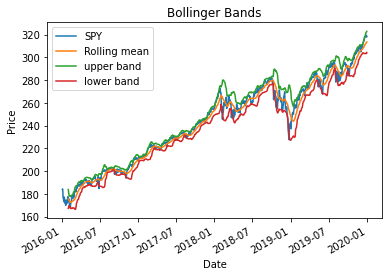

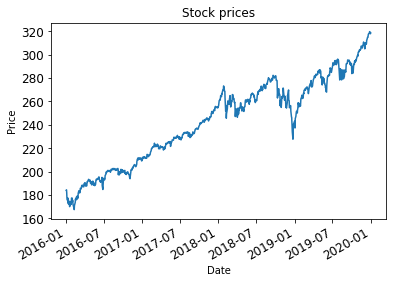

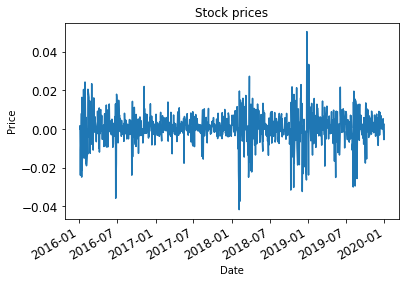

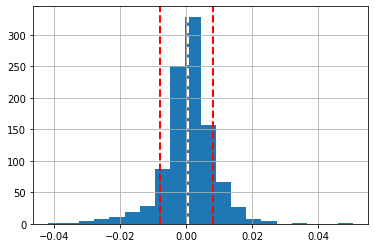

In [9]:
sa=Utilities()

dates = pd.date_range('2016-01-01', '2019-12-31') # jan to dec
# Choose stock symbols to read
symbols = ['GOOG', 'IBM', 'GLD']
df = sa.get_data(symbols, dates)

###################### Bollinger Bands ########################
bb = BollingerBands()
# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = bb.get_rolling_mean(df['SPY'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = bb.get_rolling_std(df['SPY'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = bb.get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()
####################################################

sa.plot_data(df['SPY'])
daily_ret_spy = sa.compute_daily_returns(df['SPY'])
sa.plot_data(daily_ret_spy)
daily_ret_spy.hist(bins=20)
mean, std_dev, median = sa.statistics(daily_ret_spy)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std_dev, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std_dev, color='r', linestyle='dashed', linewidth=2)
kurtosis = daily_ret_spy.kurtosis()
####################################################


In [10]:
def compute_daily_returns(df):
        daily_returns = df.copy()
        """Using Numpy"""
#         Ndaily_returns = df.copy()
#         Ndaily_returns = (df[1:]/df[:-1].values) - 1
#         Ndaily_returns.loc[0, :] = 0  # set daily returns of row 0 to 0

        """Using pandas"""
        daily_returns = (df/df.shift(1)) - 1        
        if daily_returns.ndim == 1:
            daily_returns[0] = 0
        else:
            daily_returns.loc[0] = 0  # set daily returns of row 0 to 0
        return daily_returns

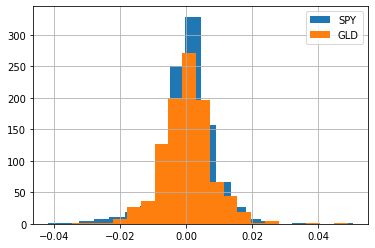

In [11]:
symbol = ['GOOG', 'GLD']
df = sa.get_data(symbol, dates)
df.head()

# a = (df/df.shift(1)) - 1 
# compute_daily_returns(df).head()
daily_returns = sa.compute_daily_returns(df)
daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['GLD'].hist(bins=20, label='GLD')
plt.legend(loc='upper right')

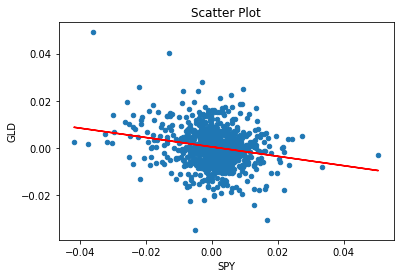

In [12]:
daily_returns.plot(kind='scatter', x='SPY', y='GLD', title='Scatter Plot')
beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1) # beta=slope, alpha = intercept
beta_GLD, alpha_GLD
fitted_line = beta_GLD*daily_returns['SPY'] + alpha_GLD
plt.plot(daily_returns['SPY'], fitted_line, '-', color='r')


In [13]:
daily_returns.corr(method='pearson')  ## correlation

,SPY,GOOG,GLD
SPY,1.000000,0.706139,-0.210634
GOOG,0.706139,1.000000,-0.126018
GLD,-0.210634,-0.126018,1.000000
